# Principal Component Analysis Implementation on meaningful data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [33]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
inputData = pd.DataFrame(data['data'], columns=data['feature_names'])
outputData = data['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(inputData, outputData, test_size=0.30)

In [54]:
scaler = StandardScaler()
N_train_data = scaler.fit_transform(X_train)
N_test_data = scaler.fit_transform(X_test)

In [56]:
N_test_data.size

5130

In [57]:
N_train_data.size

11940

In [95]:
input_dim = len(X_train.axes[1])
input_dim

30

In [62]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),  
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

2024-02-13 17:20:55.731326: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-13 17:20:55.731372: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-13 17:20:55.731383: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-13 17:20:55.731440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-13 17:20:55.731468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [63]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],)

In [64]:
model.fit(N_train_data,y_train, epochs=20, batch_size=32,)

Epoch 1/20


2024-02-13 17:22:51.324486: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-13 17:22:51.496657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 4s 75ms/step - loss: 0.5880 - accuracy: 0.6910
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.3442 - accuracy: 0.8618
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.2394 - accuracy: 0.9221
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1775 - accuracy: 0.9497
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1497 - accuracy: 0.9548
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1254 - accuracy: 0.9648
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1117 - accuracy: 0.9648
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1019 - accuracy: 0.9623
Epoch 9/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0945 - accuracy: 0.9673
Epoch 10/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0872 - accuracy: 0.9698
Epoch 11/20
13/13 [==========

In [66]:
model_beforePCA = model.evaluate(N_test_data, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.2309 - accuracy: 0.9474


In [69]:
model.save_weights('Breast_Cancer_Possibilities_Before_PCA')

In [70]:
model.summary(

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 248       
                                                                 
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 8)                 264       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,921
Trainable params: 2,921
Non-trainabl

## Now we'll apply PCA and check how it will affect our model accuracy

In [102]:
pca = PCA(n_components=8)
pca_X_train = pca.fit_transform(N_train_data)
pca_X_test = pca.fit_transform(N_test_data)
pca_X_train.size

3184

In [103]:
pca.components_

array([[ 0.21795352,  0.08190934,  0.22676159,  0.21958128,  0.14165002,
         0.23811115,  0.25849564,  0.26626995,  0.1422433 ,  0.05872106,
         0.21147729,  0.00126112,  0.21802719,  0.22137116, -0.00355969,
         0.16863554,  0.13344485,  0.1506388 ,  0.02728949,  0.08722927,
         0.2285005 ,  0.09303856,  0.23620193,  0.22444393,  0.13273732,
         0.21428725,  0.23740943,  0.25549448,  0.14155738,  0.13101956],
       [-0.22978623, -0.06894043, -0.21278563, -0.22237224,  0.19264653,
         0.15049435,  0.07290522, -0.02595312,  0.2005001 ,  0.35882288,
        -0.05512294,  0.13200808, -0.05448163, -0.12780177,  0.22994967,
         0.23715992,  0.20416991,  0.17700738,  0.22182988,  0.28088216,
        -0.21863733, -0.05916947, -0.2028649 , -0.21478913,  0.16271796,
         0.1134805 ,  0.07112139, -0.02368221,  0.12802948,  0.25109493],
       [ 0.03431662, -0.10519627,  0.02812843,  0.05816226, -0.11692381,
        -0.08277374,  0.02402183, -0.0097053 , -0

#### Visualise these components

Text(0, 0.5, 'pc2')

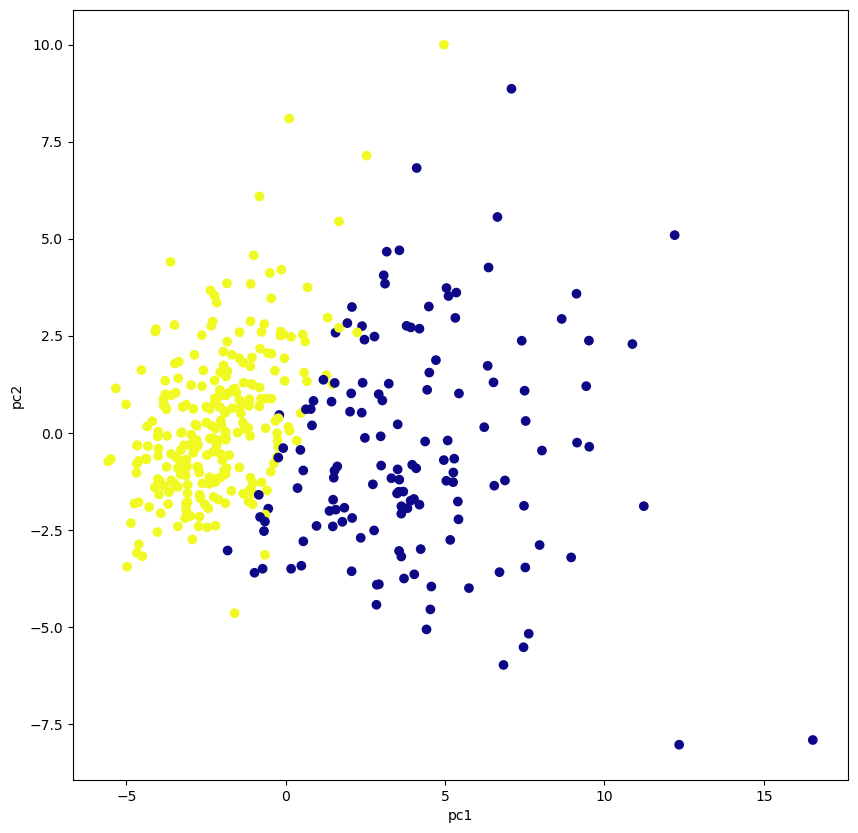

In [114]:
plt.figure(figsize=(10,10))
# plt.scatter(pc1, pc2, c=data['target_names'], cmap='plasma')
plt.scatter(pca_X_train[:, 0],pca_X_train[:, 1],c=y_train,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

#### For three principal components we need to visualise this using a 3D graph more than that won't be feasible

Text(0.5, 0, 'PC3')

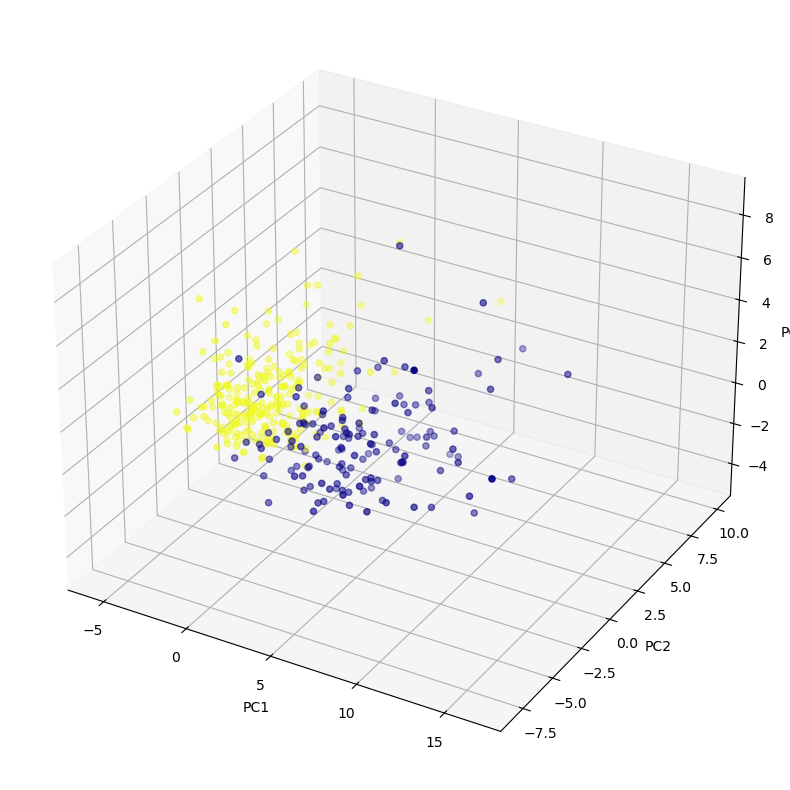

In [104]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

axis.scatter(pca_X_train[:,0],pca_X_train[:,1],pca_X_train[:,2],c=y_train,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


In [75]:
# pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [109]:
input_dim = 8


In [110]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),  
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [111]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [112]:
model.fit(pca_X_train, y_train, epochs=20, batch_size=32,)

Epoch 1/20
 1/13 [=>............................] - ETA: 3s - loss: 1.1344 - accuracy: 0.5312

2024-02-13 17:38:32.434865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 13ms/step - loss: 0.6077 - accuracy: 0.7236
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1717 - accuracy: 0.9447
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1139 - accuracy: 0.9573
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0994 - accuracy: 0.9623
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0906 - accuracy: 0.9648
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0820 - accuracy: 0.9673
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0773 - accuracy: 0.9673
Epoch 8/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0748 - accuracy: 0.9774
Epoch 9/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0718 - accuracy: 0.9774
Epoch 10/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0701 - accuracy: 0.9774
Epoch 11/20
13/13 [==========

In [115]:
model_after_pca = model.evaluate(pca_X_test, y_test)

6/6 [==============================] - 0s 10ms/step - loss: 0.4012 - accuracy: 0.9006


2024-02-13 18:23:06.611046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [116]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 32)                288       
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 8)                 264       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,745
Trainable params: 2,745
Non-traina

In [117]:
model.save_weights('Breast_Cancer_Possibilities_After_PCA')


In [118]:
model_after_pca

[0.4011523127555847, 0.9005848169326782]

In [119]:
model_after_pca

[0.4011523127555847, 0.9005848169326782]